# Dicision tree 2A

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")


In [26]:
input_file = r"D:\Machine Learning\Decision Tree\Datasets\Past hires 2.xlsx"

df = pd.read_excel(input_file, header = 0)
df.head()

,Education,Top-tier school,Interned,Hired
0,CS,N,N,N
1,ME,N,N,Y
2,EE,N,N,N
3,AE,Y,N,Y
4,IS,Y,N,N


In [27]:
df.shape

(13, 4)

In [28]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the first three columns
for col in df.columns[:3]:
    df[col] = label_encoder.fit_transform(df[col])

df

,Education,Top-tier school,Interned,Hired
0,2,0,0,N
1,7,0,0,Y
2,3,0,0,N
3,0,1,0,Y
4,4,1,0,N
5,7,1,1,Y
6,1,0,1,Y
7,7,0,1,Y
8,0,0,0,Y
9,4,0,0,Y


In [29]:
features = list(df.columns[:3])
features

['Education', 'Top-tier school', 'Interned']

In [30]:
y = df["Hired"]
X = df[features]

In [31]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Fit the decision tree model
model = DecisionTreeClassifier(criterion='gini')#criterion='entropy'
model.fit(X_train, y_train)
model

DecisionTreeClassifier()

In [33]:
X_train

,Education,Top-tier school,Interned
8,0,0,0
5,7,1,1
2,3,0,0
1,7,0,0
12,8,1,0
4,4,1,0
7,7,0,1
10,6,1,0
3,0,1,0
6,1,0,1


In [34]:
y_train

8     Y
5     Y
2     N
1     Y
12    Y
4     N
7     Y
10    N
3     Y
6     Y
Name: Hired, dtype: object

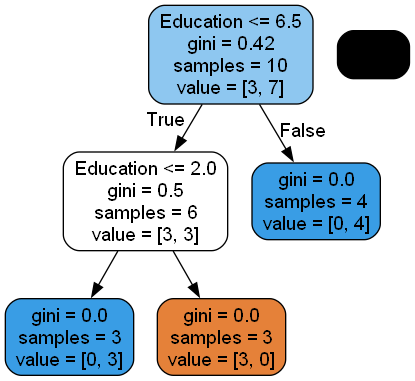

In [35]:
# Export the tree to DOT format
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

In [36]:
y_pred = model.predict(X_test)
y_pred

array(['N', 'N', 'Y'], dtype=object)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00       1.0
           Y       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion Matrix:
 [[0 1]
 [2 0]]


In [38]:
new = [[5,1,1]]
y_pred = model.predict(new)
y_pred[0]

'N'

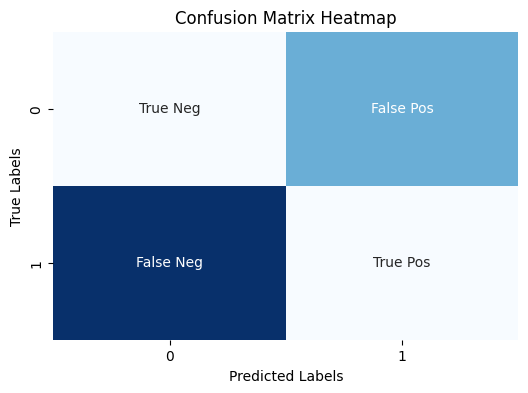

In [39]:
# Calculate the total number of instances
total_instances = np.sum(conf_matrix)

# Create a heatmap with labels and percentages
labels = np.array([['True Neg', 'False Pos'], ['False Neg', 'True Pos']])
percentages = conf_matrix / total_instances

plt.figure(figsize=(6, 4))
sns.heatmap(percentages, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()